In [4]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization

In [6]:
from keras.datasets import cifar10

0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck

In [8]:
(x_train, y_train), (x_test, y_test) =cifar10.load_data()

170500096/170498071 [==============================] - 343s 2us/step


In [10]:
x_train.shape

(50000, 32, 32, 3)

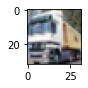

In [12]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[1,:,:,:])

In [17]:
y_train[1]

array([9], dtype=uint8)

## Prepocessing

In [51]:
x_train =x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [52]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [53]:
from keras.utils import np_utils

In [54]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [55]:
y_train 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Creating CNn Model

In [60]:
num_classes = 10

In [61]:
model =Sequential()
model.add(Conv2D(32, (3,3), padding='same',activation ='relu', input_shape=x_train[0].shape))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), padding='same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

In [63]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
h = model.fit(x_train,y_train, epochs=10, batch_size=32, validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 188s 117ms/step - loss: 1.7861 - accuracy: 0.3556 - val_loss: 1.2239 - val_accuracy: 0.5717
Epoch 2/10
1563/1563 [==============================] - 182s 116ms/step - loss: 1.2238 - accuracy: 0.5640 - val_loss: 1.0627 - val_accuracy: 0.6193
Epoch 3/10
1115/1563 [====================>.........] - ETA: 50s - loss: 1.0515 - accuracy: 0.6278

In [32]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

In [33]:
h.history

{'loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'accuracy': [0.100040003657341,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612],
 'val_loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'val_accuracy': [0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612]}

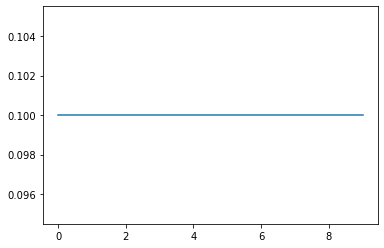

In [36]:
plt.plot(h.history['val_accuracy'])

In [37]:
model.save('test_model.h5')

In [38]:
#This is extremely poor

In [39]:
im =plt.imread('download.jpg')

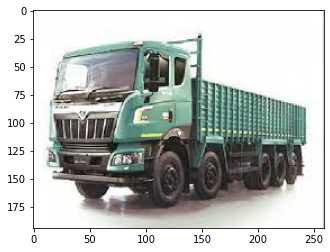

In [40]:
plt.imshow(im)

In [41]:
im.shape

(194, 259, 3)

In [42]:
from PIL import Image
im = Image.open('download.jpg')

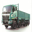

In [43]:
im = im.resize((32,32))
im

In [45]:
im.size

(32, 32)

In [47]:
import numpy as np
im = np.expand_dims(im,axis=0)
im.shape

(1, 32, 32, 3)

In [48]:
type(im)

numpy.ndarray

In [49]:
model.predict_classes([im])

C:\Users\Amit\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]])